## Ejercicio 4 y 10

Realice en python una representacion de su arbol familiar, construya la dependica de abuelos, tios, padres, primos e hijos en su familia.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G = nx.DiGraph()

G.add_edges_from([
    ('Abuelo: Emilio', 'Padre: Jaime'),   
    ('Abuelo: Emilio', 'Tío: Jose'),
    ('Abuelo: Emilio', 'Tío: Ismael'),
    ('Abuelo: Emilio', 'Tío: Eloy'),
    ('Abuela: Angelica', 'Padre: Jaime'),   
    ('Abuela: Angelica', 'Tío: Jose'),
    ('Abuela: Angelica', 'Tío: Ismael'),
    ('Abuela: Angelica', 'Tío: Eloy'),
    ('Abuelo: Nicolas', 'Madre: Julia'),
    ('Abuela: Flora', 'Madre: Julia'),
    ('Padre: Jaime', 'Yo'),
    ('Madre: Julia', 'Yo'),
    ('Padre: Jaime', 'Hermano: Luis'),
    ('Padre: Jaime', 'Hermana: Mariela'),
    ('Madre: Julia', 'Hermano: Luis'),
    ('Madre: Julia', 'Hermana: Mariela'),
    ('Tío: Eloy', 'Primo: Manuel'),
    ('Tío: Eloy', 'Prima: Leiza')
])

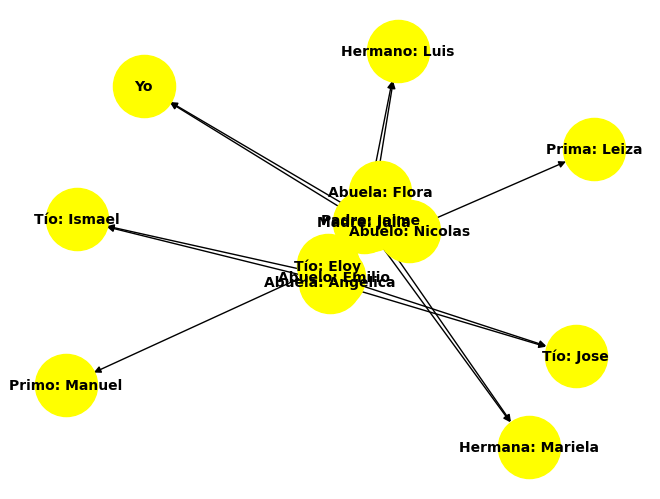

Padres de Yo: ['Padre: Jaime', 'Madre: Julia']
Abuelos de Yo: ['Abuelo: Emilio', 'Abuela: Angelica', 'Abuelo: Nicolas', 'Abuela: Flora']
Tíos de Yo: ['Tío: Jose', 'Tío: Ismael', 'Tío: Eloy']
Primos de Yo: ['Primo: Manuel', 'Prima: Leiza']


In [4]:
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='yellow', font_size=10, font_weight='bold')
plt.show()

# Relacionar

def get_parents(G, person):
    return list(G.predecessors(person))

def get_children(G, person):
    return list(G.successors(person))

def get_grandparents(G, person):
    parents = get_parents(G, person)
    grandparents = []
    for parent in parents:
        grandparents.extend(get_parents(G, parent))
    return grandparents

def get_uncles_aunts(G, person):
    parents = get_parents(G, person)
    uncles_aunts = []
    for parent in parents:
        uncles_aunts.extend(get_children(G, get_parents(G, parent)[0]))
    return [ua for ua in uncles_aunts if ua not in parents]

def get_cousins(G, person):
    uncles_aunts = get_uncles_aunts(G, person)
    cousins = []
    for ua in uncles_aunts:
        cousins.extend(get_children(G, ua))
    return cousins

# Ejemplos de uso
print("Padres de Yo:", get_parents(G, 'Yo'))
print("Abuelos de Yo:", get_grandparents(G, 'Yo'))
print("Tíos de Yo:", get_uncles_aunts(G, 'Yo'))
print("Primos de Yo:", get_cousins(G, 'Yo'))